In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import csv

In [2]:
#matplotlib function that will plot the graphs
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

# Central Province

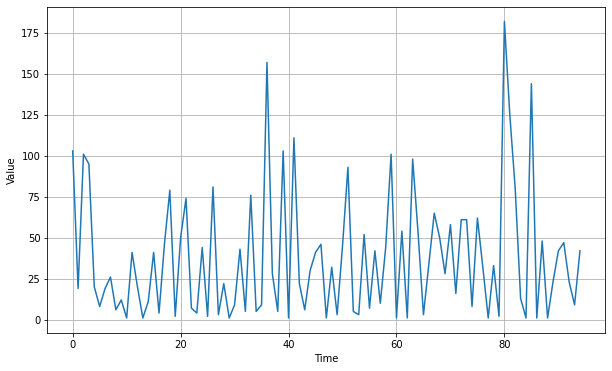

In [5]:
time_step = []
cases = []

#same procedure follows for each province
#open csv, ignore header, each row is counted as a timestep
#plot cases against timesteps
with open('../final province csvs/central_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [6]:
#depending on the number of rows (of each province), split data into training and validation sets
split_time = 15
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [8]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [9]:
#refined hyperparameters
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

#define deep learning model
model_central = tf.keras.models.Sequential([
  #convolution 1d layer, lstm layers, followed by a regular dense logistic layer
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

#stochastic gradient descent used for optimization
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

#compile using huber loss and mean absolute error
model_central.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_central = model_central.fit(train_set, epochs=300)

Epoch 1/300
2/2 [==============================] - 1s 689ms/step - loss: 31.2394 - mae: 31.7394
Epoch 2/300
2/2 [==============================] - 0s 19ms/step - loss: 31.2254 - mae: 31.7254
Epoch 3/300
2/2 [==============================] - 0s 12ms/step - loss: 31.2001 - mae: 31.7001
Epoch 4/300
2/2 [==============================] - 0s 12ms/step - loss: 31.1652 - mae: 31.6652
Epoch 5/300
2/2 [==============================] - 0s 17ms/step - loss: 31.1227 - mae: 31.6227
Epoch 6/300
2/2 [==============================] - 0s 16ms/step - loss: 31.0742 - mae: 31.5742
Epoch 7/300
2/2 [==============================] - 0s 16ms/step - loss: 31.0205 - mae: 31.5205
Epoch 8/300
2/2 [==============================] - 0s 16ms/step - loss: 30.9626 - mae: 31.4626
Epoch 9/300
2/2 [==============================] - 0s 16ms/step - loss: 30.9016 - mae: 31.4016
Epoch 10/300
2/2 [==============================] - 0s 16ms/step - loss: 30.8380 - mae: 31.3380
Epoch 11/300
2/2 [==============================

2/2 [==============================] - 0s 9ms/step - loss: 25.6554 - mae: 26.1554
Epoch 88/300
2/2 [==============================] - 0s 9ms/step - loss: 25.5941 - mae: 26.0941
Epoch 89/300
2/2 [==============================] - 0s 9ms/step - loss: 25.5322 - mae: 26.0322
Epoch 90/300
2/2 [==============================] - 0s 6ms/step - loss: 25.4725 - mae: 25.9725
Epoch 91/300
2/2 [==============================] - 0s 9ms/step - loss: 25.4100 - mae: 25.9100
Epoch 92/300
2/2 [==============================] - 0s 9ms/step - loss: 25.3474 - mae: 25.8474
Epoch 93/300
2/2 [==============================] - 0s 9ms/step - loss: 25.2877 - mae: 25.7877
Epoch 94/300
2/2 [==============================] - 0s 11ms/step - loss: 25.2264 - mae: 25.7264
Epoch 95/300
2/2 [==============================] - 0s 11ms/step - loss: 25.1644 - mae: 25.6644
Epoch 96/300
2/2 [==============================] - 0s 10ms/step - loss: 25.1057 - mae: 25.6057
Epoch 97/300
2/2 [==============================] - 0s 8ms/s

2/2 [==============================] - 0s 10ms/step - loss: 21.0069 - mae: 21.4905
Epoch 172/300
2/2 [==============================] - 0s 10ms/step - loss: 20.9622 - mae: 21.4455
Epoch 173/300
2/2 [==============================] - 0s 9ms/step - loss: 20.9149 - mae: 21.3973
Epoch 174/300
2/2 [==============================] - 0s 9ms/step - loss: 20.8713 - mae: 21.3528
Epoch 175/300
2/2 [==============================] - 0s 10ms/step - loss: 20.8271 - mae: 21.3079
Epoch 176/300
2/2 [==============================] - 0s 10ms/step - loss: 20.7845 - mae: 21.2647
Epoch 177/300
2/2 [==============================] - 0s 11ms/step - loss: 20.7389 - mae: 21.2201
Epoch 178/300
2/2 [==============================] - 0s 12ms/step - loss: 20.6994 - mae: 21.1811
Epoch 179/300
2/2 [==============================] - 0s 6ms/step - loss: 20.6555 - mae: 21.1370
Epoch 180/300
2/2 [==============================] - 0s 8ms/step - loss: 20.6147 - mae: 21.0965
Epoch 181/300
2/2 [=============================

2/2 [==============================] - 0s 14ms/step - loss: 18.6396 - mae: 19.1338
Epoch 257/300
2/2 [==============================] - 0s 16ms/step - loss: 18.6235 - mae: 19.1171
Epoch 258/300
2/2 [==============================] - 0s 16ms/step - loss: 18.6062 - mae: 19.0988
Epoch 259/300
2/2 [==============================] - 0s 16ms/step - loss: 18.5887 - mae: 19.0810
Epoch 260/300
2/2 [==============================] - 0s 14ms/step - loss: 18.5720 - mae: 19.0636
Epoch 261/300
2/2 [==============================] - 0s 15ms/step - loss: 18.5522 - mae: 19.0426
Epoch 262/300
2/2 [==============================] - 0s 13ms/step - loss: 18.5363 - mae: 19.0267
Epoch 263/300
2/2 [==============================] - 0s 14ms/step - loss: 18.5183 - mae: 19.0094
Epoch 264/300
2/2 [==============================] - 0s 20ms/step - loss: 18.5007 - mae: 18.9925
Epoch 265/300
2/2 [==============================] - 0s 7ms/step - loss: 18.4841 - mae: 18.9766
Epoch 266/300
2/2 [==========================

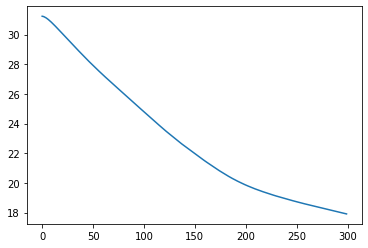

In [10]:
plt.plot(history_central.history['loss'])

In [11]:
#forecast validation section
rnn_forecast = model_forecast(model_central, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

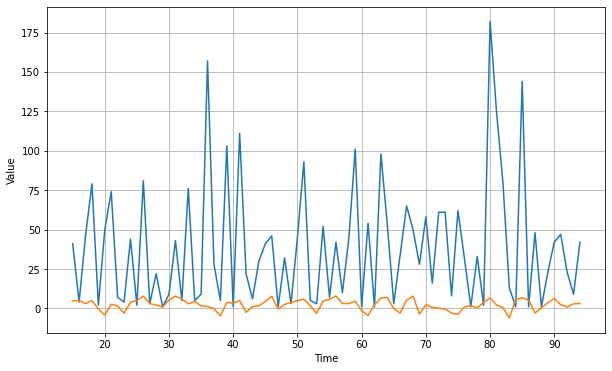

In [12]:
#plot graph of actual and predicted, for the validation test sections
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [14]:
#save model
model_central.save("../models/lstm-model-central-prov.h5")

# Eastern Province

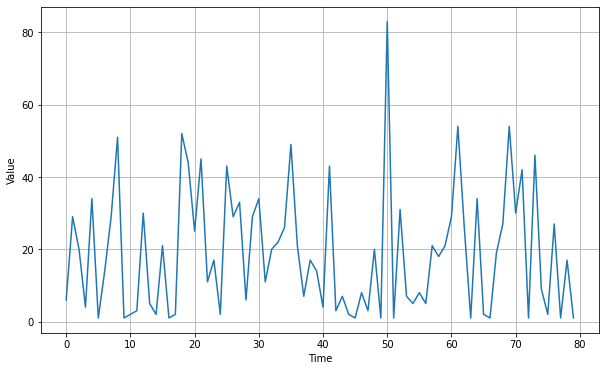

In [16]:
time_step = []
cases = []

with open('../final province csvs/eastern_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [17]:
split_time = 7
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [19]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_eastern = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_eastern.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_eastern = model_eastern.fit(train_set, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 22.3049 - mae: 22.8049
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 22.2992 - mae: 22.7992
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 22.2883 - mae: 22.7883
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 22.2729 - mae: 22.7729
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 22.2533 - mae: 22.7533
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 22.2300 - mae: 22.7300
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 22.2033 - mae: 22.7033
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 22.1736 - mae: 22.6736
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 22.1411 - mae: 22.6411
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 22.1062 - mae: 22.6062
Epoch 11/100
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 1ms/step - loss: 17.8977 - mae: 18.3977
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 17.8421 - mae: 18.3421
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 17.7865 - mae: 18.2865
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 17.7310 - mae: 18.2310
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 17.6754 - mae: 18.1754
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 17.6199 - mae: 18.1199
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 17.5644 - mae: 18.0644
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 17.5088 - mae: 18.0088
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4533 - mae: 17.9533
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 17.3978 - mae: 17.8978
Epoch 97/100
1/1 [==============================] - 0s 2ms/step

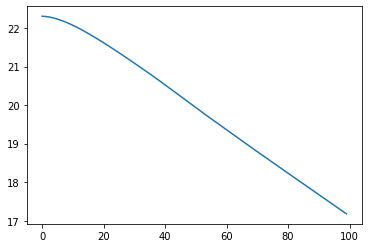

In [20]:
plt.plot(history_eastern.history['loss'])

In [21]:
rnn_forecast = model_forecast(model_eastern, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

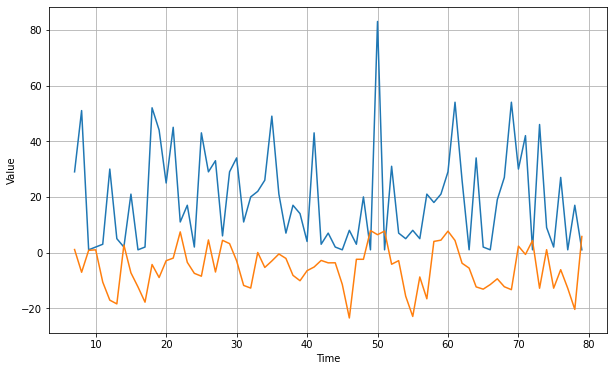

In [22]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [23]:
model_eastern.save("../models/lstm-model-eastern-prov.h5")

# northcentral_province

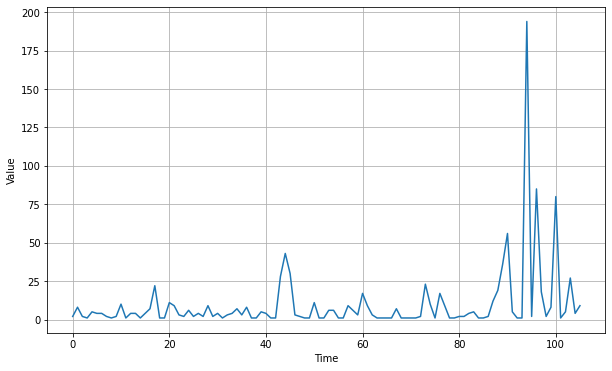

In [25]:
time_step = []
cases = []

with open('../final province csvs/northcentral_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [26]:
split_time = 40
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [27]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_ncentral = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_ncentral.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_ncentral = model_ncentral.fit(train_set, epochs=300)

Epoch 1/300
7/7 [==============================] - 0s 24ms/step - loss: 3.8872 - mae: 4.3865
Epoch 2/300
7/7 [==============================] - 0s 22ms/step - loss: 3.8045 - mae: 4.3020
Epoch 3/300
7/7 [==============================] - 0s 25ms/step - loss: 3.6856 - mae: 4.1777
Epoch 4/300
7/7 [==============================] - 0s 28ms/step - loss: 3.5565 - mae: 4.0388
Epoch 5/300
7/7 [==============================] - 0s 27ms/step - loss: 3.4297 - mae: 3.8963
Epoch 6/300
7/7 [==============================] - 0s 25ms/step - loss: 3.3075 - mae: 3.7554
Epoch 7/300
7/7 [==============================] - 0s 20ms/step - loss: 3.1937 - mae: 3.6192
Epoch 8/300
7/7 [==============================] - 0s 20ms/step - loss: 3.0876 - mae: 3.4952
Epoch 9/300
7/7 [==============================] - 0s 20ms/step - loss: 2.9904 - mae: 3.4023
Epoch 10/300
7/7 [==============================] - 0s 32ms/step - loss: 2.9032 - mae: 3.3296
Epoch 11/300
7/7 [==============================] - 0s 31ms/step - lo

7/7 [==============================] - 0s 18ms/step - loss: 2.2032 - mae: 2.6688
Epoch 88/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2031 - mae: 2.6687
Epoch 89/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2030 - mae: 2.6685
Epoch 90/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2028 - mae: 2.6683
Epoch 91/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2028 - mae: 2.6683
Epoch 92/300
7/7 [==============================] - 0s 19ms/step - loss: 2.2026 - mae: 2.6681
Epoch 93/300
7/7 [==============================] - 0s 19ms/step - loss: 2.2025 - mae: 2.6680
Epoch 94/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2024 - mae: 2.6678
Epoch 95/300
7/7 [==============================] - 0s 18ms/step - loss: 2.2023 - mae: 2.6677
Epoch 96/300
7/7 [==============================] - 0s 21ms/step - loss: 2.2022 - mae: 2.6676
Epoch 97/300
7/7 [==============================] - 0s 20ms/step - loss: 

7/7 [==============================] - 0s 18ms/step - loss: 2.1985 - mae: 2.6640
Epoch 173/300
7/7 [==============================] - 0s 22ms/step - loss: 2.1984 - mae: 2.6640
Epoch 174/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1984 - mae: 2.6640
Epoch 175/300
7/7 [==============================] - 0s 24ms/step - loss: 2.1984 - mae: 2.6639
Epoch 176/300
7/7 [==============================] - 0s 22ms/step - loss: 2.1983 - mae: 2.6639
Epoch 177/300
7/7 [==============================] - 0s 19ms/step - loss: 2.1984 - mae: 2.6639
Epoch 178/300
7/7 [==============================] - 0s 17ms/step - loss: 2.1983 - mae: 2.6638
Epoch 179/300
7/7 [==============================] - 0s 24ms/step - loss: 2.1983 - mae: 2.6638
Epoch 180/300
7/7 [==============================] - 0s 24ms/step - loss: 2.1982 - mae: 2.6638
Epoch 181/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1982 - mae: 2.6637
Epoch 182/300
7/7 [==============================] - 0s 18ms/ste

7/7 [==============================] - 0s 18ms/step - loss: 2.1956 - mae: 2.6613
Epoch 258/300
7/7 [==============================] - 0s 17ms/step - loss: 2.1956 - mae: 2.6613
Epoch 259/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1956 - mae: 2.6613
Epoch 260/300
7/7 [==============================] - 0s 16ms/step - loss: 2.1956 - mae: 2.6613
Epoch 261/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1955 - mae: 2.6613
Epoch 262/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1955 - mae: 2.6613
Epoch 263/300
7/7 [==============================] - 0s 17ms/step - loss: 2.1955 - mae: 2.6612
Epoch 264/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1955 - mae: 2.6612
Epoch 265/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1955 - mae: 2.6612
Epoch 266/300
7/7 [==============================] - 0s 18ms/step - loss: 2.1955 - mae: 2.6612
Epoch 267/300
7/7 [==============================] - 0s 18ms/ste

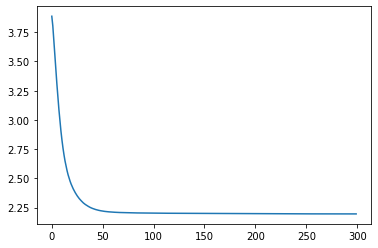

In [28]:
plt.plot(history_ncentral.history['loss'])

In [29]:
rnn_forecast = model_forecast(model_ncentral, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

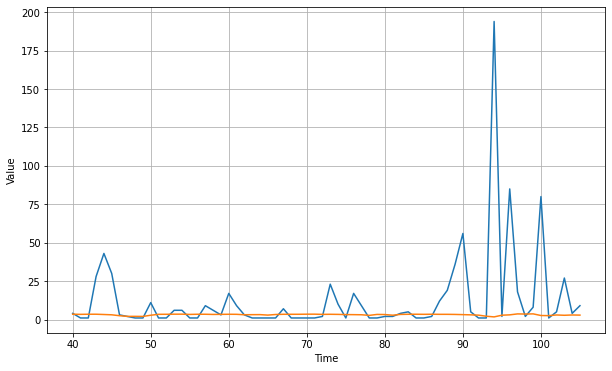

In [30]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [31]:
model_ncentral.save("../models/lstm-model-northcentral-prov.h5")

# northwestern_province

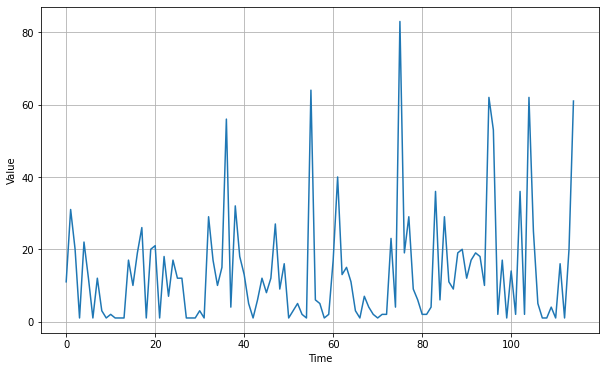

In [33]:
time_step = []
cases = []

with open('../final province csvs/northwestern_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [34]:
split_time = 33
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [35]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_nwestern = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_nwestern.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_nwestern = model_nwestern.fit(train_set, epochs=300)

Epoch 1/300
6/6 [==============================] - 0s 21ms/step - loss: 8.6489 - mae: 9.1382
Epoch 2/300
6/6 [==============================] - 0s 21ms/step - loss: 8.5944 - mae: 9.0793
Epoch 3/300
6/6 [==============================] - 0s 20ms/step - loss: 8.5123 - mae: 8.9880
Epoch 4/300
6/6 [==============================] - 0s 22ms/step - loss: 8.4210 - mae: 8.8864
Epoch 5/300
6/6 [==============================] - 0s 21ms/step - loss: 8.3298 - mae: 8.7804
Epoch 6/300
6/6 [==============================] - 0s 17ms/step - loss: 8.2457 - mae: 8.6785
Epoch 7/300
6/6 [==============================] - 0s 13ms/step - loss: 8.1655 - mae: 8.5799
Epoch 8/300
6/6 [==============================] - 0s 25ms/step - loss: 8.0924 - mae: 8.4857
Epoch 9/300
6/6 [==============================] - 0s 25ms/step - loss: 8.0239 - mae: 8.4033
Epoch 10/300
6/6 [==============================] - 0s 25ms/step - loss: 7.9642 - mae: 8.3321
Epoch 11/300
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 16ms/step - loss: 7.3680 - mae: 7.8526
Epoch 89/300
6/6 [==============================] - 0s 18ms/step - loss: 7.3674 - mae: 7.8520
Epoch 90/300
6/6 [==============================] - 0s 18ms/step - loss: 7.3660 - mae: 7.8506
Epoch 91/300
6/6 [==============================] - 0s 19ms/step - loss: 7.3650 - mae: 7.8495
Epoch 92/300
6/6 [==============================] - 0s 13ms/step - loss: 7.3632 - mae: 7.8477
Epoch 93/300
6/6 [==============================] - 0s 15ms/step - loss: 7.3621 - mae: 7.8466
Epoch 94/300
6/6 [==============================] - 0s 14ms/step - loss: 7.3608 - mae: 7.8456
Epoch 95/300
6/6 [==============================] - 0s 15ms/step - loss: 7.3594 - mae: 7.8445
Epoch 96/300
6/6 [==============================] - 0s 16ms/step - loss: 7.3579 - mae: 7.8433
Epoch 97/300
6/6 [==============================] - 0s 17ms/step - loss: 7.3565 - mae: 7.8424
Epoch 98/300
6/6 [==============================] - 0s 17ms/step - loss: 

6/6 [==============================] - 0s 19ms/step - loss: 7.2962 - mae: 7.7951
Epoch 175/300
6/6 [==============================] - 0s 21ms/step - loss: 7.2957 - mae: 7.7946
Epoch 176/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2947 - mae: 7.7937
Epoch 177/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2940 - mae: 7.7930
Epoch 178/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2937 - mae: 7.7929
Epoch 179/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2931 - mae: 7.7923
Epoch 180/300
6/6 [==============================] - 0s 18ms/step - loss: 7.2920 - mae: 7.7912
Epoch 181/300
6/6 [==============================] - 0s 16ms/step - loss: 7.2914 - mae: 7.7907
Epoch 182/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2907 - mae: 7.7900
Epoch 183/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2901 - mae: 7.7895
Epoch 184/300
6/6 [==============================] - 0s 16ms/ste

6/6 [==============================] - 0s 17ms/step - loss: 7.2531 - mae: 7.7531
Epoch 261/300
6/6 [==============================] - 0s 14ms/step - loss: 7.2524 - mae: 7.7524
Epoch 262/300
6/6 [==============================] - 0s 15ms/step - loss: 7.2521 - mae: 7.7521
Epoch 263/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2516 - mae: 7.7516
Epoch 264/300
6/6 [==============================] - 0s 14ms/step - loss: 7.2515 - mae: 7.7515
Epoch 265/300
6/6 [==============================] - 0s 15ms/step - loss: 7.2510 - mae: 7.7510
Epoch 266/300
6/6 [==============================] - 0s 18ms/step - loss: 7.2506 - mae: 7.7506
Epoch 267/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2503 - mae: 7.7503
Epoch 268/300
6/6 [==============================] - 0s 16ms/step - loss: 7.2499 - mae: 7.7499
Epoch 269/300
6/6 [==============================] - 0s 17ms/step - loss: 7.2495 - mae: 7.7495
Epoch 270/300
6/6 [==============================] - 0s 17ms/ste

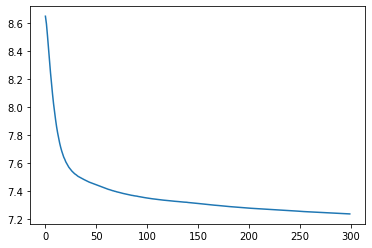

In [36]:
plt.plot(history_nwestern.history['loss'])

In [37]:
rnn_forecast = model_forecast(model_nwestern, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

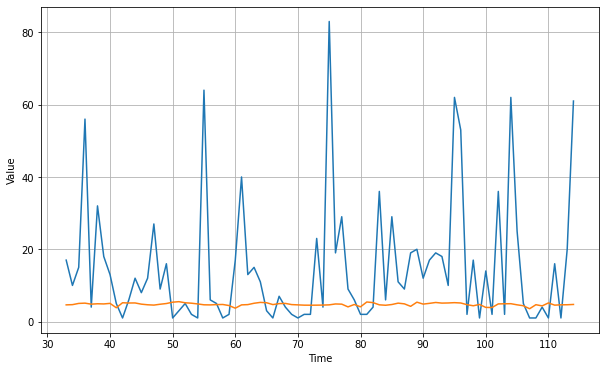

In [38]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [39]:
model_nwestern.save("../models/lstm-model-northwestern-prov.h5")

# northern

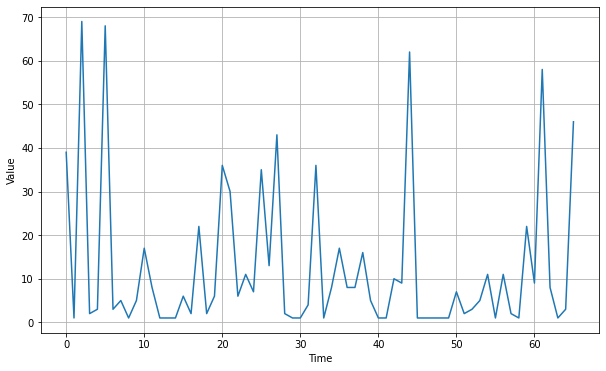

In [40]:
time_step = []
cases = []

with open('../final province csvs/nothern_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [41]:
split_time = 10
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [42]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_northern = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_northern.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_northern = model_northern.fit(train_set, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 20ms/step - loss: 20.9821 - mae: 21.4821
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 20.9770 - mae: 21.4769
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 20.9672 - mae: 21.4671
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 20.9530 - mae: 21.4529
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 20.9350 - mae: 21.4348
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 20.9135 - mae: 21.4132
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 20.8888 - mae: 21.3884
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 20.8616 - mae: 21.3610
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 20.8320 - mae: 21.3313
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 20.8003 - mae: 21.2993
Epoch 11/300
1/1 [==============================] - 0s 3ms

1/1 [==============================] - 0s 3ms/step - loss: 18.8819 - mae: 19.3352
Epoch 88/300
1/1 [==============================] - 0s 4ms/step - loss: 18.8769 - mae: 19.3304
Epoch 89/300
1/1 [==============================] - 0s 3ms/step - loss: 18.8720 - mae: 19.3257
Epoch 90/300
1/1 [==============================] - 0s 4ms/step - loss: 18.8674 - mae: 19.3211
Epoch 91/300
1/1 [==============================] - 0s 3ms/step - loss: 18.8631 - mae: 19.3166
Epoch 92/300
1/1 [==============================] - 0s 3ms/step - loss: 18.8589 - mae: 19.3122
Epoch 93/300
1/1 [==============================] - 0s 4ms/step - loss: 18.8548 - mae: 19.3078
Epoch 94/300
1/1 [==============================] - 0s 5ms/step - loss: 18.8510 - mae: 19.3048
Epoch 95/300
1/1 [==============================] - 0s 4ms/step - loss: 18.8472 - mae: 19.3018
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 18.8437 - mae: 19.2989
Epoch 97/300
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 5ms/step - loss: 18.7508 - mae: 19.2133
Epoch 173/300
1/1 [==============================] - 0s 5ms/step - loss: 18.7503 - mae: 19.2127
Epoch 174/300
1/1 [==============================] - 0s 6ms/step - loss: 18.7499 - mae: 19.2121
Epoch 175/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7495 - mae: 19.2115
Epoch 176/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7491 - mae: 19.2110
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 18.7487 - mae: 19.2104
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 18.7483 - mae: 19.2098
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7479 - mae: 19.2093
Epoch 180/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7475 - mae: 19.2087
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7471 - mae: 19.2081
Epoch 182/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 6ms/step - loss: 18.7297 - mae: 19.1794
Epoch 258/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7295 - mae: 19.1792
Epoch 259/300
1/1 [==============================] - 0s 793us/step - loss: 18.7294 - mae: 19.1791
Epoch 260/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7292 - mae: 19.1789
Epoch 261/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7291 - mae: 19.1787
Epoch 262/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7289 - mae: 19.1785
Epoch 263/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7287 - mae: 19.1784
Epoch 264/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7286 - mae: 19.1782
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 18.7284 - mae: 19.1780
Epoch 266/300
1/1 [==============================] - 0s 3ms/step - loss: 18.7283 - mae: 19.1778
Epoch 267/300
1/1 [==============================] -

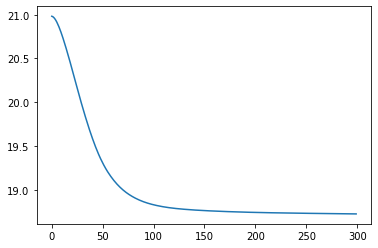

In [43]:
plt.plot(history_northern.history['loss'])

In [44]:
rnn_forecast = model_forecast(model_northern, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

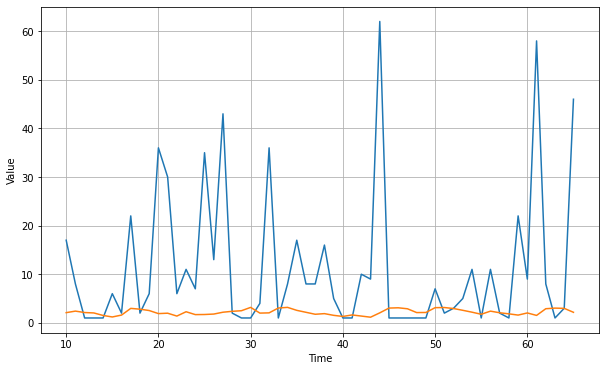

In [45]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [46]:
model_northern.save("../models/lstm-model-northern-prov.h5")

# sabaragamuwa_province

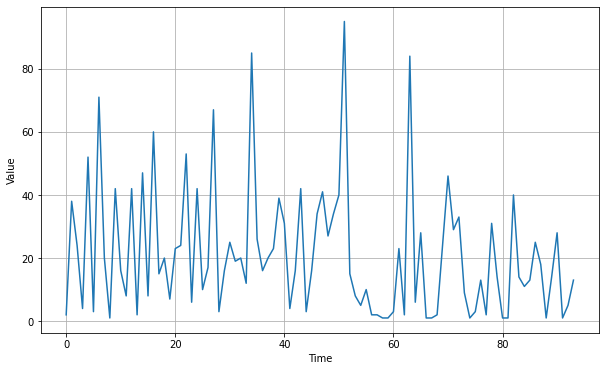

In [47]:
time_step = []
cases = []

with open('../final province csvs/sabaragamuwa_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [48]:
split_time = 13
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [49]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_sabaragamuwa = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_sabaragamuwa.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_sabaragamuwa = model_sabaragamuwa.fit(train_set, epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 20ms/step - loss: 25.5748 - mae: 26.0522
Epoch 2/300
2/2 [==============================] - 0s 13ms/step - loss: 25.5622 - mae: 26.0403
Epoch 3/300
2/2 [==============================] - 0s 13ms/step - loss: 25.5379 - mae: 26.0168
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 25.5046 - mae: 25.9854
Epoch 5/300
2/2 [==============================] - 0s 13ms/step - loss: 25.4630 - mae: 25.9450
Epoch 6/300
2/2 [==============================] - 0s 13ms/step - loss: 25.4163 - mae: 25.9003
Epoch 7/300
2/2 [==============================] - 0s 13ms/step - loss: 25.3637 - mae: 25.8485
Epoch 8/300
2/2 [==============================] - 0s 14ms/step - loss: 25.3097 - mae: 25.7960
Epoch 9/300
2/2 [==============================] - 0s 13ms/step - loss: 25.2517 - mae: 25.7384
Epoch 10/300
2/2 [==============================] - 0s 12ms/step - loss: 25.1912 - mae: 25.6773
Epoch 11/300
2/2 [==============================]

Epoch 86/300
2/2 [==============================] - 0s 12ms/step - loss: 22.5148 - mae: 22.9974
Epoch 87/300
2/2 [==============================] - 0s 11ms/step - loss: 22.5014 - mae: 22.9840
Epoch 88/300
2/2 [==============================] - 0s 19ms/step - loss: 22.4888 - mae: 22.9713
Epoch 89/300
2/2 [==============================] - 0s 21ms/step - loss: 22.4750 - mae: 22.9580
Epoch 90/300
2/2 [==============================] - 0s 29ms/step - loss: 22.4627 - mae: 22.9474
Epoch 91/300
2/2 [==============================] - 0s 21ms/step - loss: 22.4506 - mae: 22.9360
Epoch 92/300
2/2 [==============================] - 0s 20ms/step - loss: 22.4377 - mae: 22.9239
Epoch 93/300
2/2 [==============================] - 0s 21ms/step - loss: 22.4253 - mae: 22.9123
Epoch 94/300
2/2 [==============================] - 0s 20ms/step - loss: 22.4139 - mae: 22.9020
Epoch 95/300
2/2 [==============================] - 0s 20ms/step - loss: 22.4022 - mae: 22.8910
Epoch 96/300
2/2 [======================

2/2 [==============================] - 0s 11ms/step - loss: 21.7442 - mae: 22.2432
Epoch 171/300
2/2 [==============================] - 0s 11ms/step - loss: 21.7367 - mae: 22.2354
Epoch 172/300
2/2 [==============================] - 0s 16ms/step - loss: 21.7299 - mae: 22.2285
Epoch 173/300
2/2 [==============================] - 0s 16ms/step - loss: 21.7224 - mae: 22.2208
Epoch 174/300
2/2 [==============================] - 0s 17ms/step - loss: 21.7152 - mae: 22.2133
Epoch 175/300
2/2 [==============================] - 0s 18ms/step - loss: 21.7081 - mae: 22.2059
Epoch 176/300
2/2 [==============================] - 0s 21ms/step - loss: 21.7004 - mae: 22.1980
Epoch 177/300
2/2 [==============================] - 0s 21ms/step - loss: 21.6936 - mae: 22.1907
Epoch 178/300
2/2 [==============================] - 0s 11ms/step - loss: 21.6866 - mae: 22.1834
Epoch 179/300
2/2 [==============================] - 0s 15ms/step - loss: 21.6797 - mae: 22.1762
Epoch 180/300
2/2 [=========================

2/2 [==============================] - 0s 14ms/step - loss: 21.2352 - mae: 21.7352
Epoch 255/300
2/2 [==============================] - 0s 13ms/step - loss: 21.2304 - mae: 21.7304
Epoch 256/300
2/2 [==============================] - 0s 14ms/step - loss: 21.2246 - mae: 21.7246
Epoch 257/300
2/2 [==============================] - 0s 18ms/step - loss: 21.2194 - mae: 21.7194
Epoch 258/300
2/2 [==============================] - 0s 16ms/step - loss: 21.2146 - mae: 21.7146
Epoch 259/300
2/2 [==============================] - 0s 17ms/step - loss: 21.2086 - mae: 21.7086
Epoch 260/300
2/2 [==============================] - 0s 18ms/step - loss: 21.2040 - mae: 21.7040
Epoch 261/300
2/2 [==============================] - 0s 18ms/step - loss: 21.1986 - mae: 21.6986
Epoch 262/300
2/2 [==============================] - 0s 18ms/step - loss: 21.1933 - mae: 21.6933
Epoch 263/300
2/2 [==============================] - 0s 17ms/step - loss: 21.1880 - mae: 21.6880
Epoch 264/300
2/2 [=========================

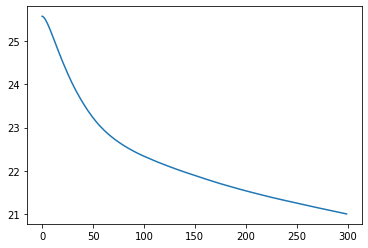

In [50]:
plt.plot(history_sabaragamuwa.history['loss'])

In [51]:
rnn_forecast = model_forecast(model_sabaragamuwa, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

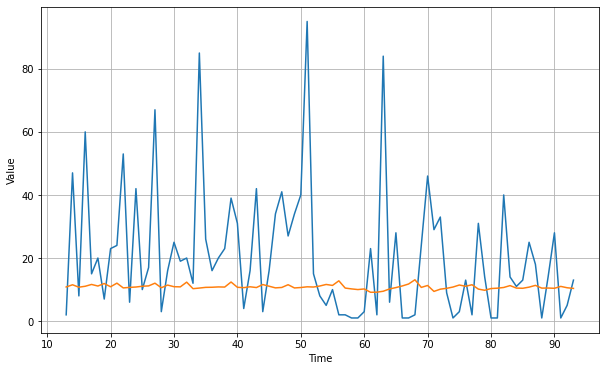

In [52]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [54]:
model_sabaragamuwa.save("../models/lstm-model-sabaragamuwa-prov.h5")

# southern_province

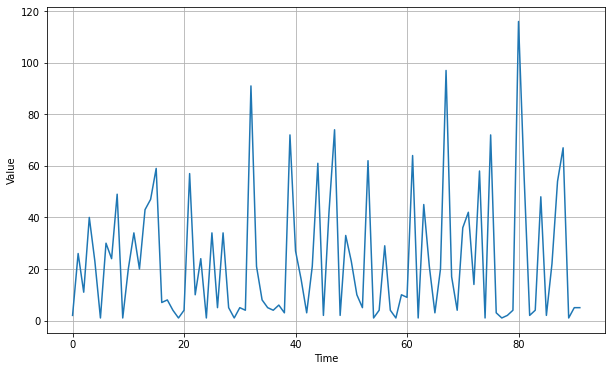

In [55]:
time_step = []
cases = []

with open('../final province csvs/southern_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [56]:
split_time = 13
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [57]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_southern = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_southern.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_southern = model_southern.fit(train_set, epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 22ms/step - loss: 23.3042 - mae: 23.8042
Epoch 2/300
2/2 [==============================] - 0s 8ms/step - loss: 23.2927 - mae: 23.7927
Epoch 3/300
2/2 [==============================] - 0s 12ms/step - loss: 23.2710 - mae: 23.7710
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 23.2406 - mae: 23.7406
Epoch 5/300
2/2 [==============================] - 0s 14ms/step - loss: 23.2038 - mae: 23.7038
Epoch 6/300
2/2 [==============================] - 0s 8ms/step - loss: 23.1613 - mae: 23.6613
Epoch 7/300
2/2 [==============================] - 0s 8ms/step - loss: 23.1148 - mae: 23.6148
Epoch 8/300
2/2 [==============================] - 0s 8ms/step - loss: 23.0648 - mae: 23.5646
Epoch 9/300
2/2 [==============================] - 0s 13ms/step - loss: 23.0121 - mae: 23.5117
Epoch 10/300
2/2 [==============================] - 0s 12ms/step - loss: 22.9572 - mae: 23.4564
Epoch 11/300
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 20.5889 - mae: 21.0889
Epoch 87/300
2/2 [==============================] - 0s 11ms/step - loss: 20.5700 - mae: 21.0700
Epoch 88/300
2/2 [==============================] - 0s 10ms/step - loss: 20.5510 - mae: 21.0510
Epoch 89/300
2/2 [==============================] - 0s 11ms/step - loss: 20.5319 - mae: 21.0319
Epoch 90/300
2/2 [==============================] - 0s 13ms/step - loss: 20.5138 - mae: 21.0138
Epoch 91/300
2/2 [==============================] - 0s 16ms/step - loss: 20.4946 - mae: 20.9946
Epoch 92/300
2/2 [==============================] - 0s 12ms/step - loss: 20.4748 - mae: 20.9748
Epoch 93/300
2/2 [==============================] - 0s 12ms/step - loss: 20.4561 - mae: 20.9561
Epoch 94/300
2/2 [==============================] - 0s 13ms/step - loss: 20.4371 - mae: 20.9371
Epoch 95/300
2/2 [==============================] - 0s 13ms/step - loss: 20.4189 - mae: 20.9189
Epoch 96/300
2/2 [==============================] - 0

2/2 [==============================] - 0s 9ms/step - loss: 18.9671 - mae: 19.4671
Epoch 171/300
2/2 [==============================] - 0s 10ms/step - loss: 18.9484 - mae: 19.4484
Epoch 172/300
2/2 [==============================] - 0s 11ms/step - loss: 18.9286 - mae: 19.4286
Epoch 173/300
2/2 [==============================] - 0s 11ms/step - loss: 18.9092 - mae: 19.4092
Epoch 174/300
2/2 [==============================] - 0s 11ms/step - loss: 18.8889 - mae: 19.3889
Epoch 175/300
2/2 [==============================] - 0s 11ms/step - loss: 18.8696 - mae: 19.3696
Epoch 176/300
2/2 [==============================] - 0s 12ms/step - loss: 18.8511 - mae: 19.3511
Epoch 177/300
2/2 [==============================] - 0s 10ms/step - loss: 18.8316 - mae: 19.3316
Epoch 178/300
2/2 [==============================] - 0s 11ms/step - loss: 18.8114 - mae: 19.3114
Epoch 179/300
2/2 [==============================] - 0s 11ms/step - loss: 18.7921 - mae: 19.2921
Epoch 180/300
2/2 [==========================

2/2 [==============================] - 0s 10ms/step - loss: 17.3097 - mae: 17.8097
Epoch 255/300
2/2 [==============================] - 0s 12ms/step - loss: 17.2903 - mae: 17.7903
Epoch 256/300
2/2 [==============================] - 0s 11ms/step - loss: 17.2701 - mae: 17.7701
Epoch 257/300
2/2 [==============================] - 0s 13ms/step - loss: 17.2492 - mae: 17.7492
Epoch 258/300
2/2 [==============================] - 0s 12ms/step - loss: 17.2292 - mae: 17.7292
Epoch 259/300
2/2 [==============================] - 0s 9ms/step - loss: 17.2092 - mae: 17.7092
Epoch 260/300
2/2 [==============================] - 0s 11ms/step - loss: 17.1899 - mae: 17.6899
Epoch 261/300
2/2 [==============================] - 0s 11ms/step - loss: 17.1697 - mae: 17.6697
Epoch 262/300
2/2 [==============================] - 0s 11ms/step - loss: 17.1489 - mae: 17.6489
Epoch 263/300
2/2 [==============================] - 0s 12ms/step - loss: 17.1290 - mae: 17.6290
Epoch 264/300
2/2 [==========================

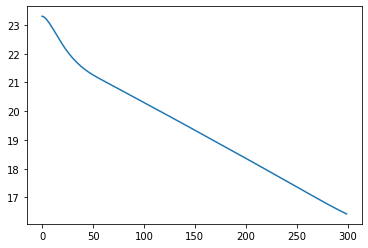

In [58]:
plt.plot(history_southern.history['loss'])

In [59]:
rnn_forecast = model_forecast(model_southern, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

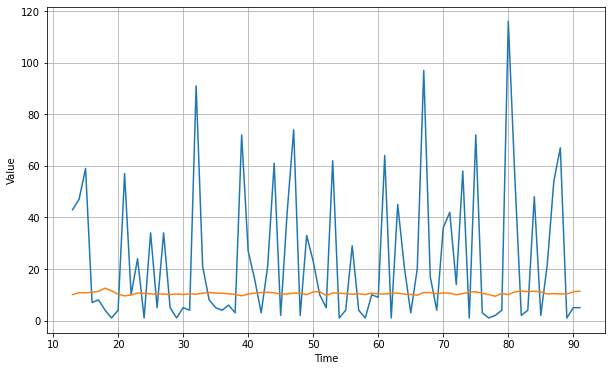

In [60]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [61]:
model_southern.save("../models/lstm-model-southern-prov.h5")

# uva_province

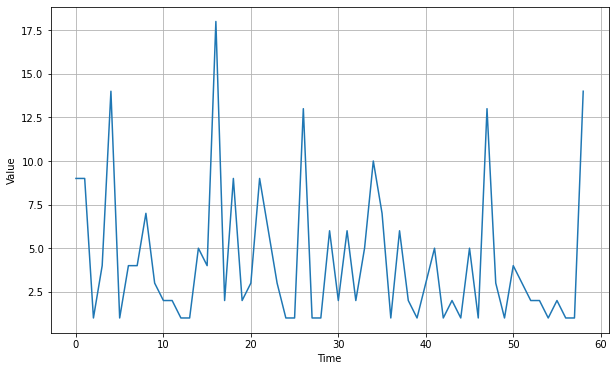

In [62]:
time_step = []
cases = []

with open('../final province csvs/uva_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [63]:
split_time = 9
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [64]:
shuffle_buffer_size = 10
window_size = 5
batch_size = 5
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_uva = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_uva.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_uva = model_uva.fit(train_set, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 20ms/step - loss: 5.4740 - mae: 5.9740
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 5.4698 - mae: 5.9698
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 5.4618 - mae: 5.9618
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 5.4505 - mae: 5.9505
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 5.4363 - mae: 5.9363
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 5.4198 - mae: 5.9198
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 5.4011 - mae: 5.9011
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 5.3808 - mae: 5.8808
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 5.3594 - mae: 5.8593
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 5.3370 - mae: 5.8369
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 5.3143

1/1 [==============================] - 0s 2ms/step - loss: 4.0420 - mae: 4.4599
Epoch 90/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0326 - mae: 4.4526
Epoch 91/300
1/1 [==============================] - 0s 3ms/step - loss: 4.0233 - mae: 4.4453
Epoch 92/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0142 - mae: 4.4381
Epoch 93/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0051 - mae: 4.4310
Epoch 94/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9962 - mae: 4.4238
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 3.9873 - mae: 4.4167
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 3.9786 - mae: 4.4097
Epoch 97/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9699 - mae: 4.4027
Epoch 98/300
1/1 [==============================] - 0s 3ms/step - loss: 3.9614 - mae: 4.3957
Epoch 99/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9529 - ma

1/1 [==============================] - 0s 3ms/step - loss: 3.5537 - mae: 4.0465
Epoch 177/300
1/1 [==============================] - 0s 2ms/step - loss: 3.5504 - mae: 4.0434
Epoch 178/300
1/1 [==============================] - 0s 2ms/step - loss: 3.5470 - mae: 4.0403
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5437 - mae: 4.0372
Epoch 180/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5404 - mae: 4.0341
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5371 - mae: 4.0310
Epoch 182/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5338 - mae: 4.0279
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5305 - mae: 4.0248
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5273 - mae: 4.0218
Epoch 185/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5240 - mae: 4.0187
Epoch 186/300
1/1 [==============================] - 0s 3ms/step - loss: 3

1/1 [==============================] - 0s 2ms/step - loss: 3.2921 - mae: 3.7921
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 3.2893 - mae: 3.7893
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 3.2866 - mae: 3.7866
Epoch 266/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2838 - mae: 3.7838
Epoch 267/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2810 - mae: 3.7810
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 3.2782 - mae: 3.7782
Epoch 269/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2755 - mae: 3.7755
Epoch 270/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2727 - mae: 3.7727
Epoch 271/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2699 - mae: 3.7699
Epoch 272/300
1/1 [==============================] - 0s 3ms/step - loss: 3.2672 - mae: 3.7672
Epoch 273/300
1/1 [==============================] - 0s 3ms/step - loss: 3

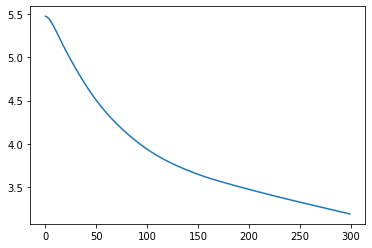

In [65]:
plt.plot(history_uva.history['loss'])

In [66]:
rnn_forecast = model_forecast(model_uva, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

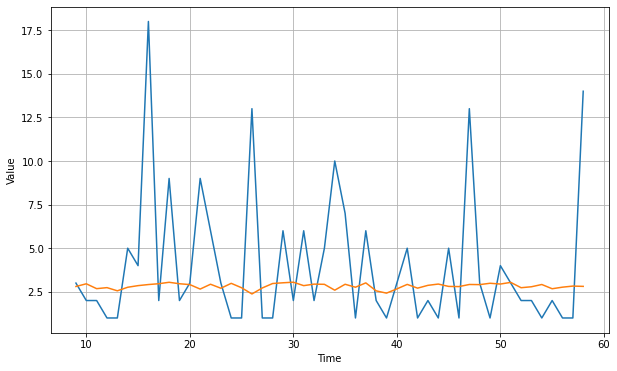

In [67]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [68]:
model_uva.save("../models/lstm-model-uva-prov.h5")

# western_province

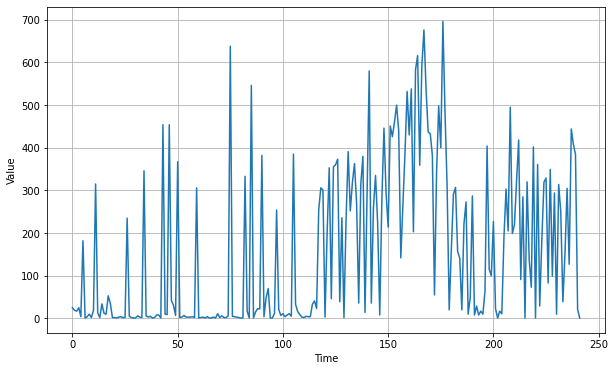

In [69]:
time_step = []
cases = []

with open('../final province csvs/western_province.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  steps = 0
  for row in reader:
    cases.append(float(row[3]))
    time_step.append(steps)
    steps+=1

series = np.array(cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [70]:
split_time = 110
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [71]:
shuffle_buffer_size = 10
window_size = 20
batch_size = 10
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model_western = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model_western.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history_western = model_western.fit(train_set, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 71ms/step - loss: 55.8615 - mae: 56.3412
Epoch 2/100
9/9 [==============================] - 1s 57ms/step - loss: 55.4966 - mae: 55.9785
Epoch 3/100
9/9 [==============================] - 1s 81ms/step - loss: 55.1650 - mae: 55.6413
Epoch 4/100
9/9 [==============================] - 0s 50ms/step - loss: 55.4792 - mae: 55.9575
Epoch 5/100
9/9 [==============================] - 1s 65ms/step - loss: 56.4017 - mae: 56.8866
Epoch 6/100
9/9 [==============================] - 1s 66ms/step - loss: 57.8120 - mae: 58.3040
Epoch 7/100
9/9 [==============================] - 1s 69ms/step - loss: 57.9137 - mae: 58.4073
Epoch 8/100
9/9 [==============================] - 1s 62ms/step - loss: 56.6744 - mae: 57.1618
Epoch 9/100
9/9 [==============================] - 1s 58ms/step - loss: 55.8076 - mae: 56.2870
Epoch 10/100
9/9 [==============================] - 0s 54ms/step - loss: 55.3838 - mae: 55.8632
Epoch 11/100
9/9 [==============================]

9/9 [==============================] - 0s 51ms/step - loss: 54.4384 - mae: 54.9134
Epoch 86/100
9/9 [==============================] - 0s 49ms/step - loss: 54.4354 - mae: 54.9059
Epoch 87/100
9/9 [==============================] - 0s 54ms/step - loss: 54.4978 - mae: 54.9765
Epoch 88/100
9/9 [==============================] - 0s 51ms/step - loss: 54.6459 - mae: 55.1229
Epoch 89/100
9/9 [==============================] - 0s 52ms/step - loss: 54.5850 - mae: 55.0595
Epoch 90/100
9/9 [==============================] - 0s 53ms/step - loss: 54.6592 - mae: 55.1266
Epoch 91/100
9/9 [==============================] - 0s 52ms/step - loss: 54.5266 - mae: 55.0006: 0s - loss: 46.6393 - mae: 4
Epoch 92/100
9/9 [==============================] - 0s 51ms/step - loss: 54.3801 - mae: 54.8543
Epoch 93/100
9/9 [==============================] - 1s 58ms/step - loss: 54.3463 - mae: 54.8217
Epoch 94/100
9/9 [==============================] - 0s 54ms/step - loss: 54.3788 - mae: 54.8535
Epoch 95/100
9/9 [======

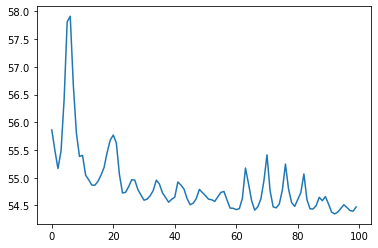

In [72]:
plt.plot(history_western.history['loss'])

In [73]:
rnn_forecast = model_forecast(model_western, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

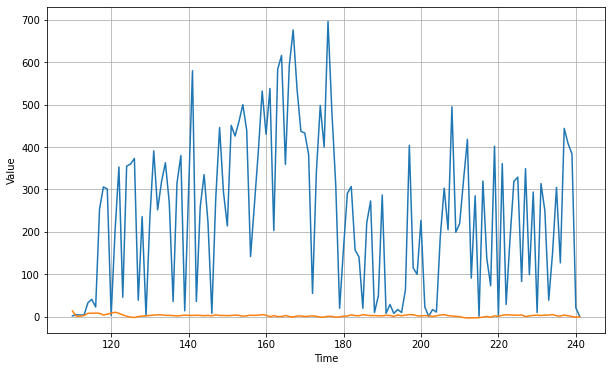

In [74]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [75]:
model_western.save("../models/lstm-model-western-prov.h5")